# EXPERIMENTO 1: RANDOM FOREST SOBRE FASHION MNIST

Requisitos: ficheros train y test en formato CSV en una carpeta con la ruta ./data/

In [10]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

# Lectura de datos

Se leen los datos utilizando un fichero Python recomendado en la web oficial de este problema (zalando-fashion mnist)

In [15]:
train_data = pd.read_csv('./data/fashion-mnist_train.csv')
test_data  = pd.read_csv('./data/fashion-mnist_test.csv')

train_data.shape
test_data.shape 
x_train= np.array(train_data.iloc[:,1:])
x_test = np.array(test_data.iloc[:,1:])
y_train= np.array (train_data.iloc[:,0]) 
y_test = np.array(test_data.iloc[:,0]) 

In [20]:
# prueba 
x_train[0][400]

221

## Estudio experimental 

Pruebas con modelos de ML clásicos y ensembles

In [24]:
clf = RandomForestClassifier(criterion='gini',max_depth=100,n_estimators=100).fit(x_train, y_train)

In [25]:
# validación cruzada de 5 particiones 
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy')
media_cv = np.mean(scores)
print("  Validación cruzada (matriz): \n" , scores)
print("  Media de la validación cruzada 5p: " , media_cv)

  Validación cruzada (matriz): 
 [0.87841667 0.88141667 0.88341667 0.87841667 0.88308333]
  Media de la validación cruzada 5p:  0.88095


In [26]:
clf.score(x_test, y_test)

0.884

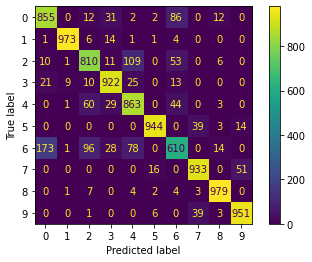

In [29]:
# PINTAR matriz de confusión provisional 
plot_confusion_matrix( clf, x_test, y_test ) # ,display_labels=['benigno','maligno'] )
# hacer la predicción para el resto de datos (test)
plt.show() 